In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
import matplotlib.animation as animation

In [49]:
%matplotlib inline

# Problem 1

Consider the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = 0.05 u_{xx}, \quad x \in [0,1], \quad t \in [0,1]\\
	&{ } u(0,t) = 0,\quad u(1,t) = 0,\\
	&{ } u(x,0) = 2\max\{0.2 - |x-0.5|,0\}.
	\end{split}
\end{align}

Approximate the solution $u(x,t)$ by taking 6 subintervals in the $x$ dimension and 10 subintervals in time.
Plot the approximation at $t=0, t=4$, and $t=1$.

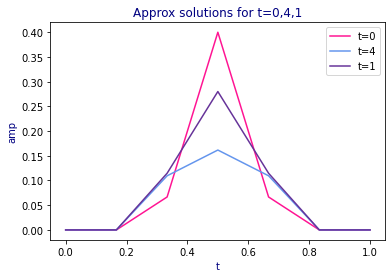

In [50]:
def prob_1(Jx, Mt, T, f, v, x, t):
    h = x[1] - x[0]
    k = t[1] - t[0]
    lam = (v*k)/(h**2)

    #make Jx+1 x Jx+1 A matrix:
    lower_diag = lam*np.ones(Jx-3)
    lower_diag[-1] = 0
    main_diag = np.ones(Jx-2)*(1 - 2*lam)
    main_diag[0] = 1
    main_diag[-1] = 1
    upper_diag = np.ones(Jx-3)*lam
    upper_diag[0] = 0

    A = np.diag(lower_diag, k=-1) + np.diag(main_diag, k=0) + np.diag(upper_diag, k=1)
    
    #start contstructing U:
    U = np.zeros((Mt, Jx))
    for i in range(len(x)):
        U[0, i] = f(x[i])

    #now can get U via the recursive formula have: 1st, last are 0s so dont need change those
    for m in range(1, Mt):   
        U[m][1:-1] = A@U[m-1][1:-1]  
        
    return U

#set up system we're given:    
Jx, Mt, T, v = 7, 11, 1, 0.05
x = np.linspace(0, 1, Jx)   #have 7 bc want 6 subintervals in x dim
t = np.linspace(0, 1, Mt)  #want 11 bc want 10 subintervals in time
f = lambda x: 2*np.max([0.2-np.abs(x-0.5), 0])  #u(x,0) = f(x)

u_found = prob_1(Jx, Mt, T, f, v, x, t)   #find the approx solution

#plot solutions at times t=0, t=04, t=1
plt.plot(x, u_found[0], color = "deeppink", label = "t=0")  #plot at t=0
plt.plot(x, u_found[4], color = "cornflowerblue", label = "t=4")  #plot at t=4
plt.plot(x, u_found[1], color = "rebeccapurple", label = "t=1")     #plot at t =1
plt.title("Approx solutions for t=0,4,1", color = "navy")
plt.legend(loc = "best")
plt.xlabel("t", color = "navy")
plt.ylabel("amp", color = "navy")
plt.show()

# Problem 2

Solve the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1], \\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}
	\end{split}
\end{align}

using the first order explicit method (1.1).
Use 140 subintervals in the $x$ dimension and 70 subintervals in time.
The initial and final states are shown in Figures 1 and 2.
Animate your results.

Explicit methods usually have a stability condition, called a CFL condition (for Courant-Friedrichs-Lewy).
For method (1.1) the CFL condition that must be satisfied is that:

$$\lambda \leq \frac{1}{2}$$

Repeat your computations using 140 subintervals in the $x$ dimension and 66 subintervals in time. Animate the results.
For these values the CFL condition is broken; you should easily see the result of this instability in the approximation $U^{66}$.


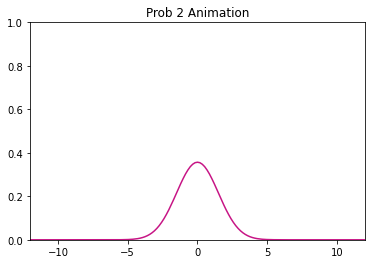

In [53]:
#first part of problem:
#set up system we're given:    
Jx2, Mt2, T2, v2 = 141, 71, 1, 1
x2 = np.linspace(-12, 12, Jx2)   
t2 = np.linspace(0, T2, Mt2)  
f2 = lambda x: np.max([1-(x**2), 0])

u_found2 = prob_1(Jx2, Mt2, T2, f2, v2, x2, t2)   #find the approx solution

#animate it:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-12,12))
ax.set_ylim((0,1))
sol, = plt.plot([],[], color = "mediumvioletred")

def update(i):
    sol.set_data(x2, list(u_found2[i]))
    return sol

plt.ioff()
ani = animation.FuncAnimation(fig, update, frames = range(Mt2), interval = 25)
plt.title("Prob 2 Animation")

animation.writer = animation.writers['ffmpeg']
ani.save("prob2.mp4")

<video src="prob2.mp4" controls>

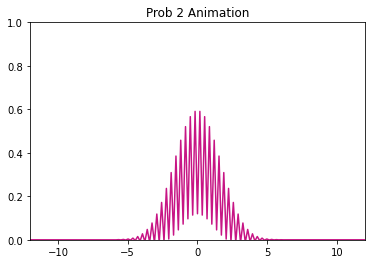

In [54]:
#second part of problem:
#set up system we're given:    
Jx3, Mt3, T3, v3 = 141, 67, 1, 1
x3 = np.linspace(-12, 12, Jx3)   
t3 = np.linspace(0, T3, Mt3)  
f3 = lambda x: np.max([1-(x**2), 0])

u_found3 = prob_1(Jx3, Mt3, T3, f3, v3, x3, t3)   #find the approx solution

#animate it:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-12,12))
ax.set_ylim((0,1))
sol, = plt.plot([],[], color = "mediumvioletred")

def update(i):
    sol.set_data(x3, list(u_found3[i]))
    return sol

plt.ioff()
ani = animation.FuncAnimation(fig, update, frames = range(Mt3), interval = 25)
plt.title("Prob 2 Animation")

animation.writer = animation.writers['ffmpeg']
ani.save("prob3.mp4")

<video src="heat_equation2.mp4" controls>

# Problem 3

Using the Crank Nicolson method, numerically approximate the solution $u(x,t)$ of the problem
\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1],\\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}.
	\end{split}
\end{align}
Note that this is an implicit linear scheme; hence, the most efficient way to find $U^{j+1}$ is to create the matrix $B$ as a sparse matrix and then use \li{scipy.sparse.linalg.solve}.

Demonstrate that the numerical approximation at $t = 1$ converges.
Do this by computing $U$ at $t=1$ using $20,40,80,160,320$, and $640$ steps.
Use the same number of steps in both time and space.
Reproduce the loglog plot shown in the lab.
The slope of the line there shows the order of convergence.

To measure the error, use the solution with the smallest $h$ (largest number of intervals) as if it were the exact solution, then sample each solution only at the x-values that are represented in the solution with the largest $h$ (smallest number of intervals).
Use the $\infty$-norm on the arrays of values at those points to measure the error.

Notice that, since the Crank-Nicolson method is unconditionally stable, there is no CFL condition, and we can safely use the same number of intervals in time and space.

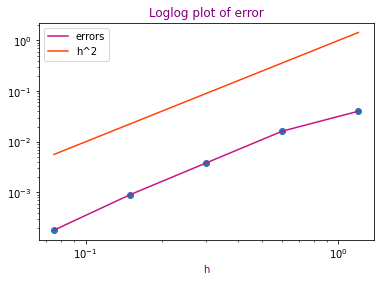

In [73]:
def heat_cn(nu,f,xbounds,tbounds,xsteps,tsteps):
    """Computes the Crank-Nicholson solution to the heat equation initial/boundary
    value problem:
    
        u_t = νu_xx, x∈[x0,x1] t∈[t0,t1]
        u(x0,t) = 0, u(x1,t) = 0
        u(x,0) = f(x)
    """
    x = np.linspace(xbounds[0], xbounds[-1], xsteps+1)
    t = np.linspace(tbounds[0], tbounds[-1], tsteps+1)
    h = x[1] - x[0]
    k = t[1] - t[0]
    lamb = (nu*k)/(2*(h**2))
    Jx = xsteps+1
    Mt = tsteps+1
    
    #make Jx+1 x Jx+1 A matrix: same as prob 1
    lower_diag = lamb*np.ones(Jx-3)
    lower_diag[-1] = 0
    main_diag = np.ones(Jx-2)*(1 - 2*lamb)
    main_diag[0] = 1
    main_diag[-1] = 1
    upper_diag = np.ones(Jx-3)*lamb
    upper_diag[0] = 0

    A = np.diag(lower_diag, k=-1) + np.diag(main_diag, k=0) + np.diag(upper_diag, k=1)
    
    #make B matrix:
    lower = -1*lamb*np.ones(Jx-3)
    lower[-1] = 0
    main = np.ones(Jx-2)*(1 + 2*lamb)
    main[0] = 1
    main[-1] = 1
    upper = -1*np.ones(Jx-3)*lamb
    upper[0] = 0

    unsparse_B = np.diag(lower, k=-1) + np.diag(main, k=0) + np.diag(upper, k=1)
    B = sp.csr_matrix(unsparse_B)  #make B sparse!
    
    
    #start contstructing U:
    U = np.zeros((Mt, Jx))
    for i in range(len(x)):
        U[0, i] = f(x[i])

    #now can get U via the recursive formula have: 1st, last are 0s so dont need change those
    for m in range(1, Mt):   
        U[m][1:-1] = spsolve(B, A@U[m-1][1:-1])
        
    return U

#define system working with:
nu = 1
f = lambda x: np.max([1-(x**2), 0])
xbounds = [-12,12]
tbounds = [0,1]
steps = [20, 40, 80, 160, 320, 640]
best_error = heat_cn(nu,f,xbounds,tbounds,640,640) #one compare rest of errors to
errors = []

for s in steps[:-1]:
    approx = heat_cn(nu, f, xbounds, tbounds, s, s)
    error = np.max(np.abs(approx[-1,:] - best_error[-1,::640//s]))
    errors.append(error)

#do loglog plot:
#plot error line and the points on it:
plt.loglog([24/n for n in steps][:-1], errors, color = "mediumvioletred",label = "errors")
plt.scatter([(24/n) for n in steps][:-1], errors)   
#plot h^2 line:
plt.loglog([(24/n) for n in steps][:-1], [(24/n)**2 for n in steps][:-1],label = 'h^2', color = "orangered")  
plt.xlabel("h", color = "purple")
plt.title("Loglog plot of error", color = "purple")
plt.legend(loc = "best")
plt.show()